In [2]:
import pandas as pd

# CSV 파일 읽어오기
df = pd.read_csv('vgsales.csv')

# DataFrame 확인
print(df.head())


   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


C:\Users\user\AppData\Local\Temp\ipykernel_5772\3661457963.py:24: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5772\3661457963.py:24: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5772\3661457963.py:24: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5772\3661457963.py:24: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5772\3661457963.py:24: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5772\3661457963.py:24: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
C:\Users

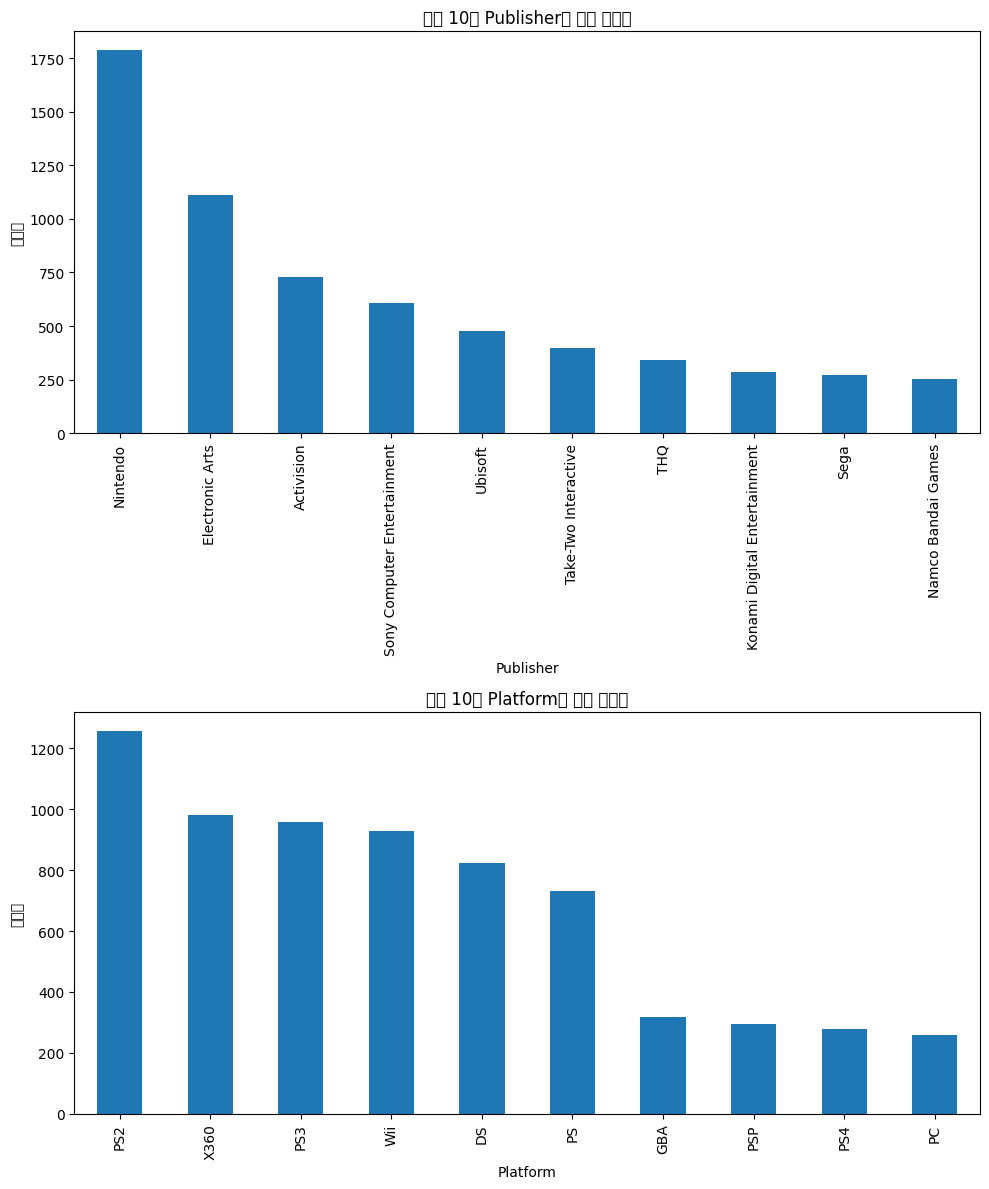

In [3]:
import matplotlib.pyplot as plt

# Publisher와 Platform에 따른 게임 판매량
df_publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
df_platform_sales = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)

# 막대 그래프 그리기
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
#한글 폰트
plt.rc('font', family='Malgun Gothic')

# Publisher(공급사)별 판매량 막대 그래프
ax1 = df_publisher_sales.plot.bar(ax=axes[0])
ax1.set_xlabel('Publisher')
ax1.set_ylabel('판매량')
ax1.set_title('상위 10개 Publisher별 게임 판매량')

# Publisher(공급사)별 판매량 막대 그래프
ax2 = df_platform_sales.plot.bar(ax=axes[1])
ax2.set_xlabel('Platform')
ax2.set_ylabel('판매량')
ax2.set_title('상위 10개 Platform별 게임 판매량')

plt.tight_layout()
plt.show()


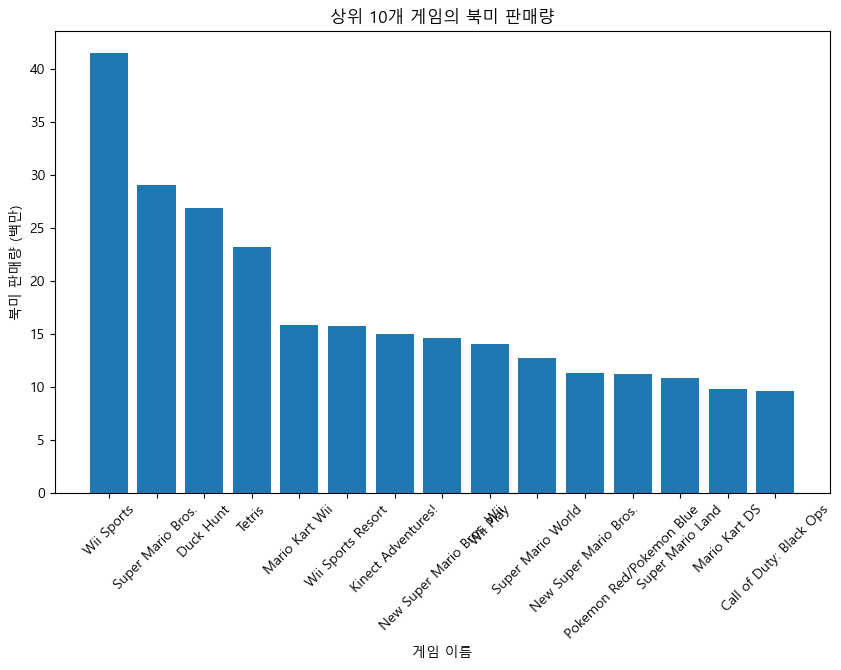

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('vgsales.csv')
# NA_Sales 열을 기준으로 데이터 정렬
sorted_data = df.sort_values('NA_Sales', ascending=False)

# 상위 10개 데이터 추출
top_15 = sorted_data.head(15)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(top_15['Name'], top_15['NA_Sales'])
plt.xlabel('게임 이름')
plt.ylabel('북미 판매량 (백만)')
plt.title('상위 10개 게임의 북미 판매량')
plt.xticks(rotation=45)
plt.show()


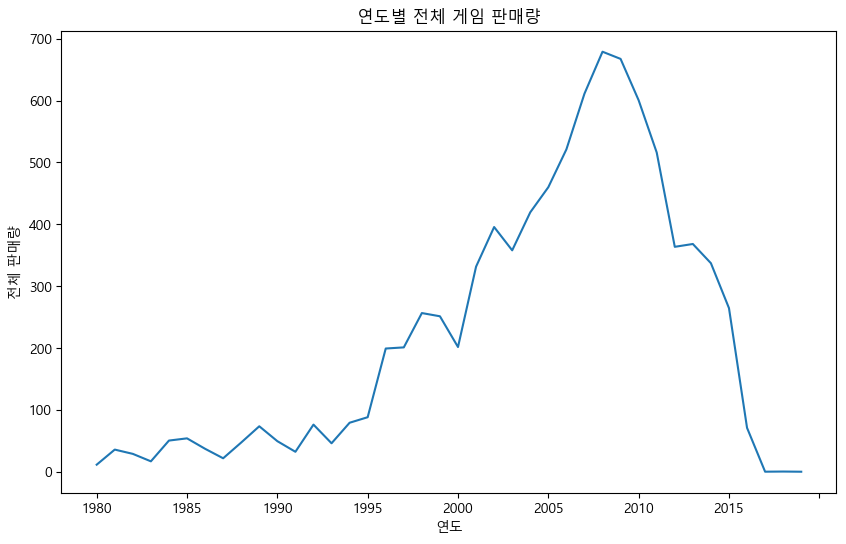

In [6]:
# 연도별 전체 게임 판매량
df_yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# 꺾은선 그래프 그리기
df_yearly_sales.plot.line(figsize=(10, 6))
plt.xlabel('연도')
plt.ylabel('전체 판매량')
plt.title('연도별 전체 게임 판매량')
plt.show()


In [2]:
import requests
from bs4 import BeautifulSoup

# URL
url = 'https://ko.wikipedia.org/wiki/리버풀_FC'

# 웹 페이지 가져와서 HTML 파싱
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 내가 가져올껀 리버풀FC 선수단 정보니까 사이트의 테이블(표) 찾기
table = soup.find('table', {'class': 'wikitable'})

# 테이블에서 행(tr)들을 찾아 순회하며 데이터 추출
players = []
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    position = columns[1].text.strip()
    nationality = columns[2].find('img')['alt']
    player_name = columns[3].find('a').text
    players.append((position, nationality, player_name))

# 결과 출력
print("리버풀 FC 선수단:")
for player in players:
    position, nationality, player_name = player
    print("포지션:", position)
    print("국적:", nationality)
    print("선수명:", player_name)
    print()

#네덜란드랑 프랑스는 왜 Flag of the Netherlands.svg 이미지 파일로 나오는지 모르겟어요.

리버풀 FC 선수단:
포지션: GK
국적: 브라질
선수명: 알리송 베케르

포지션: DF
국적: 잉글랜드
선수명: 조 고메즈

포지션: MF
국적: 브라질
선수명: 파비뉴

포지션: DF
국적: Flag of the Netherlands.svg
선수명: 버질 판 데이크

포지션: DF
국적: Flag of France (1794–1815, 1830–1974, 2020–present).svg
선수명: 이브라히마 코나테

포지션: MF
국적: 스페인
선수명: 티아고 알칸타라

포지션: MF
국적: Flag of Argentina.svg
선수명: 알렉시스 마크 알리스테르

포지션: FW
국적: 이집트
선수명: 모하메드 살라

포지션: GK
국적: 스페인
선수명: 아드리안

포지션: MF
국적: 잉글랜드
선수명: 조던 헨더슨

포지션: MF
국적: 잉글랜드
선수명: 커티스 존스

포지션: FW
국적: Flag of the Netherlands.svg
선수명: 코디 학포

